### Sprawozdanie - Interpolacja
<div style="text-align: right"> Wojciech Kosztyła </div>

In [553]:
import math
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

#### Zadanie 1 - Przekształcenie sfery w elipsoidę


##### 1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D

Rozpocząłem od stworzenia funkcji, która wyświetli mi trójwymiarowy wykres wartości.

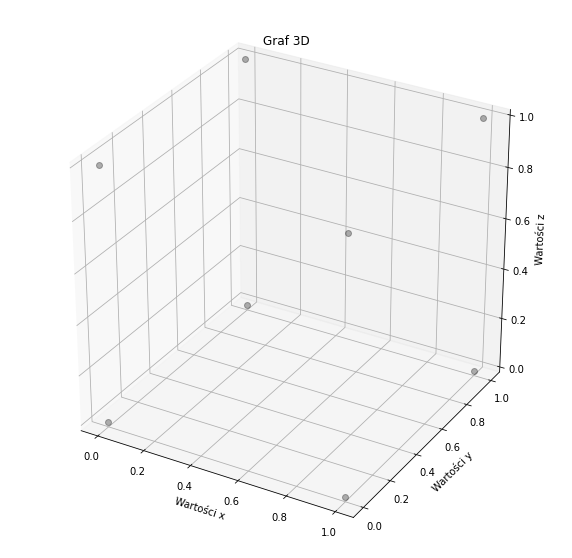

In [554]:
def rysuj_punkty_3D(wartosc_X, wartosc_Y, wartosc_Z, tytul="Graf 3D", labelx="Wartości x", labely="Wartości y", labelz="Wartości z", color=(0,0,0,0.3)):
    fig = plt.figure(figsize=(10,10))

    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(tytul)
    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.set_zlabel(labelz)

    plt.plot(wartosc_X,wartosc_Y,wartosc_Z, 'o', c=color)


kostka_x = [0,1,0,1,0,1,0,1]
kostka_y = [0,0,0,0,1,1,1,1]
kostka_z = [0,0,1,1,0,0,1,1]

rysuj_punkty_3D(kostka_x, kostka_y, kostka_z)

Funkcja działa i widać zaznaczone przeze mnie punkty.

In [555]:
def rysuj_kule_3D(dokladnosc_s, dokladnosc_t):
    kula_x = []
    kula_y = []
    kula_z = []

    for i in range(dokladnosc_s):
        for j in range(dokladnosc_t):
            s = np.pi * 2 * i / dokladnosc_s
            t = np.pi * j / dokladnosc_t
            kula_x.append(np.cos(s) * np.sin(t))
            kula_y.append(np.sin(s) * np.sin(t))
            kula_z.append(np.cos(t))

    rysuj_punkty_3D(kula_x, kula_y, kula_z, "Kula w 3D", color=(0.5,0,0.3,0.1))

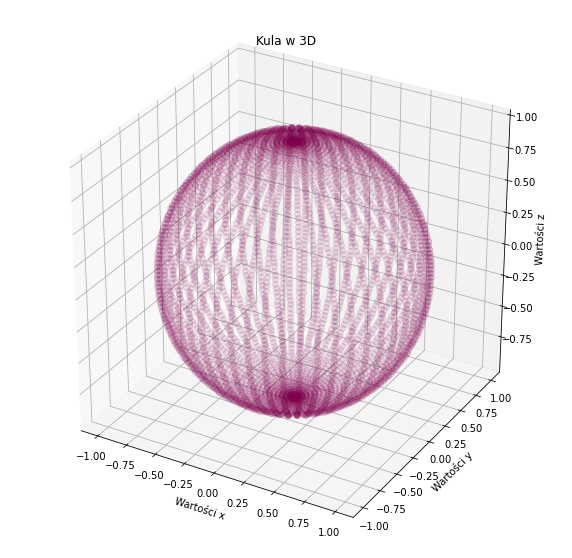

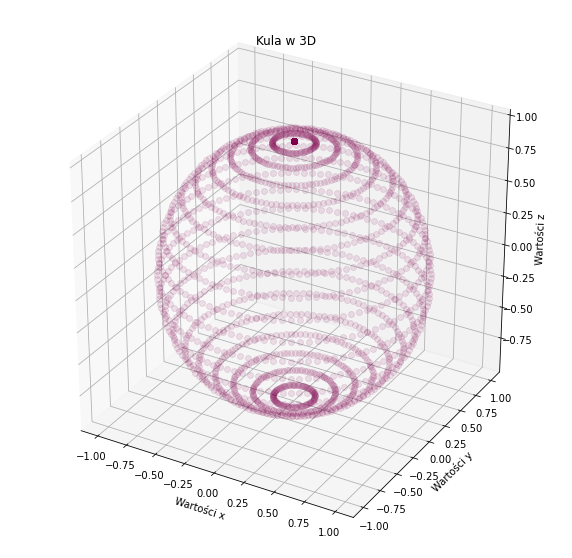

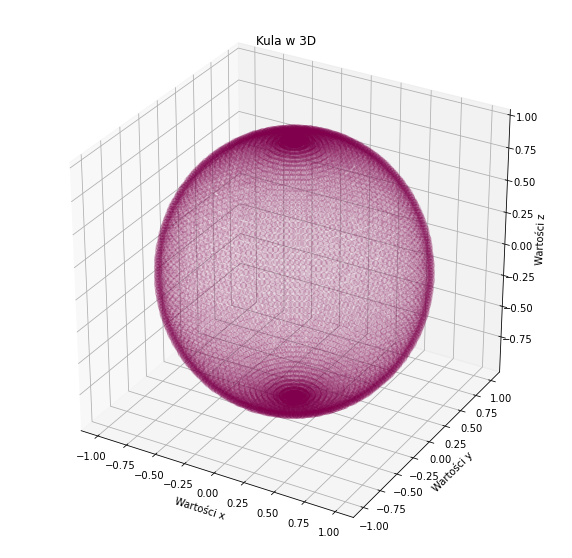

In [556]:
rysuj_kule_3D(50, 100)
rysuj_kule_3D(100,20)
rysuj_kule_3D(140, 70)

Na potrzeby przekształcania sfery macierzowo tworzę nową funkcję, która zwróci mi zbiór wektorów.

In [557]:
def tworz_kule_3D(dokladnosc_s, dokladnosc_t):
    kula_wektory = []

    for i in range(dokladnosc_s):
        for j in range(dokladnosc_t):
            s = np.pi * 2 * i / dokladnosc_s
            t = np.pi * j / dokladnosc_t

            x = np.cos(s) * np.sin(t)
            y = np.sin(s) * np.sin(t)
            z = np.cos(t)

            wektor = np.array([x,y,z])
            kula_wektory.append(wektor)

    return kula_wektory

Wygeneruj 3 różne macierze $A1$,$A2$,$A3$, ($Ai ∈ R3×3$), za ich pomocą dokonaj przekształcenia sfery w elipsoidę, a następnie przedstaw wizualizację uzyskanego wyniku.


In [558]:
macierz_A1 = [[1,   0,      1],
              [1,   1,      1],
              [1,   0,      0.5]]

macierz_A2 = [[1,   0.5,    0],
              [0,   1,      0.3],
              [0,   0,      1]]

macierz_A3 = [[0.5, 0.5,    1],
              [1,   0,      0.3],
              [0,   0,      1]]

In [559]:
def rysuj_przeksztalcone(wartosci_XYZ, macierz_transformacji, tytul="Eliptoid w 3D", color=(0.5,0,0.3,0.5)):
    nowe_wartosci_x = []
    nowe_wartosci_y = []
    nowe_wartosci_z = []
    for xyz in wartosci_XYZ:
        nowy_wektor = np.matmul(xyz, macierz_transformacji)
        nowe_wartosci_x.append(nowy_wektor[0])
        nowe_wartosci_y.append(nowy_wektor[1])
        nowe_wartosci_z.append(nowy_wektor[2])


    rysuj_punkty_3D(nowe_wartosci_x, nowe_wartosci_y, nowe_wartosci_z, tytul, color=color)

Oto wyniki przekształceń:


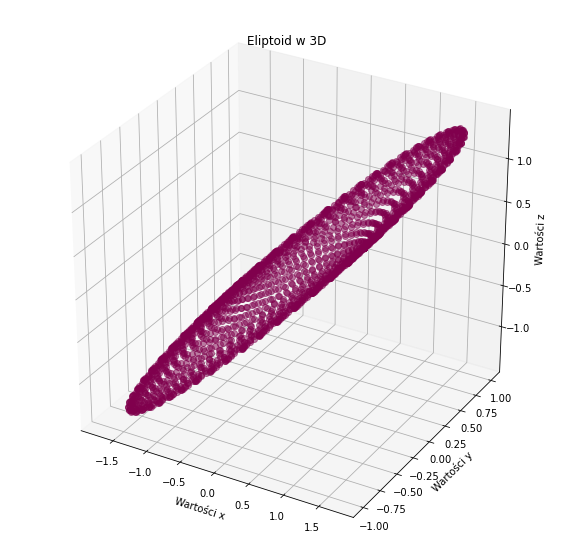

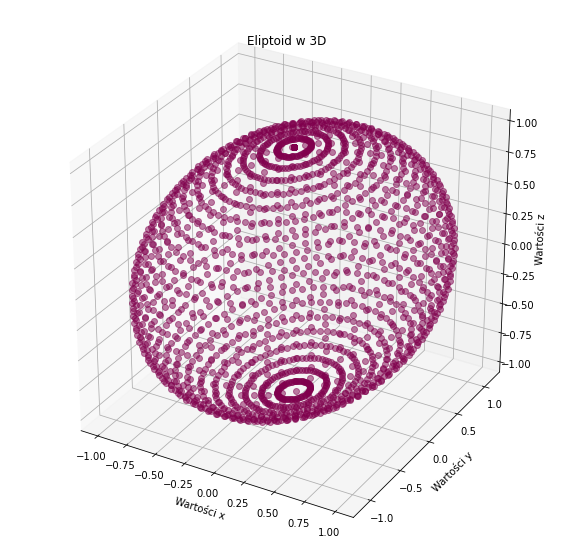

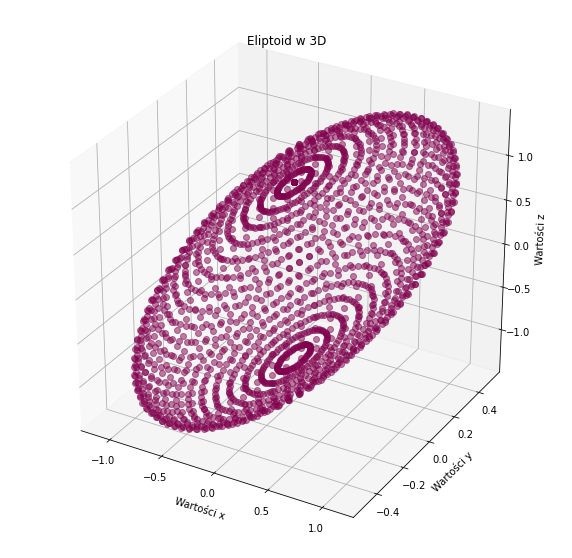

In [560]:
kula = tworz_kule_3D(70,30)
rysuj_przeksztalcone(kula, macierz_A1)
rysuj_przeksztalcone(kula, macierz_A2)
rysuj_przeksztalcone(kula, macierz_A3)

 Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy Ai. Na wykresie elipsoidy odpowiadającej przekształceniu Ai dodaj wizualizację jej półosi wyznaczonych za pomocą SVD



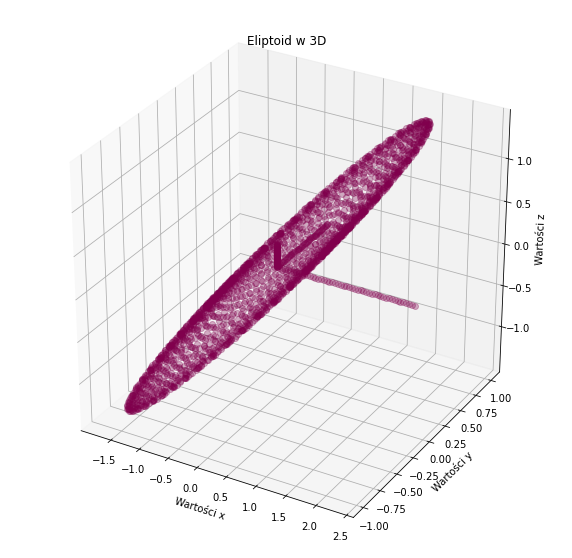

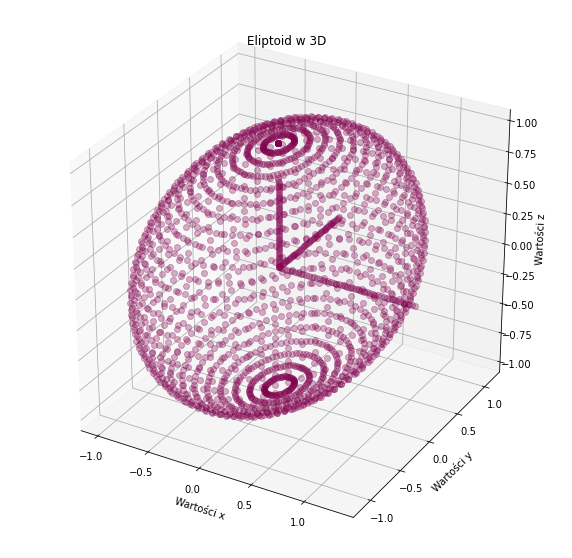

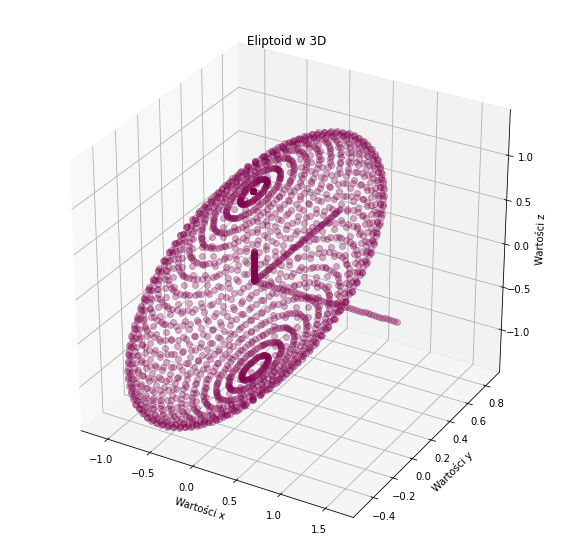

In [561]:
def rysuj_przeksztalcone_z_SVD(wartosci_XYZ, macierz_transformacji, tytul="Eliptoid w 3D", color=(0.5,0,0.3,0.3)):
    nowe_wartosci_x = []
    nowe_wartosci_y = []
    nowe_wartosci_z = []
    for xyz in wartosci_XYZ:
        nowy_wektor = np.matmul(xyz, macierz_transformacji)
        nowe_wartosci_x.append(nowy_wektor[0])
        nowe_wartosci_y.append(nowy_wektor[1])
        nowe_wartosci_z.append(nowy_wektor[2])

    u, s, vh = np.linalg.svd(macierz_transformacji)
    s = np.diag(s)

    for vector in s:
        for i in range(50):
            temp_wektor = vector * i / 50
            nowe_wartosci_x.append(temp_wektor[0])
            nowe_wartosci_y.append(temp_wektor[1])
            nowe_wartosci_z.append(temp_wektor[2])

    rysuj_punkty_3D(nowe_wartosci_x, nowe_wartosci_y, nowe_wartosci_z, tytul, color=color)

rysuj_przeksztalcone_z_SVD(kula, macierz_A1)
rysuj_przeksztalcone_z_SVD(kula, macierz_A2)
rysuj_przeksztalcone_z_SVD(kula, macierz_A3)

 Znajdź taką macierz Ai, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę.


[[0.82012095 7.92062766 5.70183974]
 [7.38665967 5.72881732 8.60138363]
 [3.83193525 2.08783717 4.14105959]]
[16.34124873  5.13944154  0.16341249]


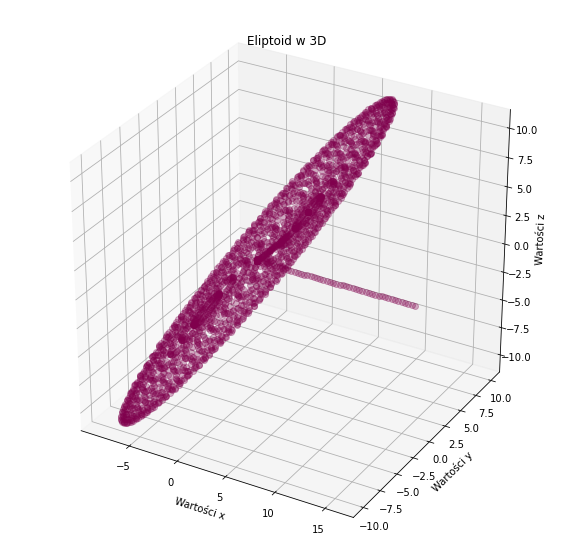

In [562]:
def stworz_macierz_condA(condA, n):
    temp_macierz = np.random.rand(n,n)
    u, s, vh = np.linalg.svd(temp_macierz)      # s ustawione malejąco

    s[0] = condA * s[n-1]
    low = s[n-1]
    high = s[0]
    for i in range(1, n-1):
        s[i] = np.random.uniform(low, high)

    macierz_diagonalna = np.diag(s)
    return np.dot(np.dot(u, macierz_diagonalna), vh)

macierz_A4 = stworz_macierz_condA(100, 3)
print(macierz_A4)
u, s, vh = np.linalg.svd(macierz_A4)

print(s)

rysuj_przeksztalcone_z_SVD(kula, macierz_A4)

 Dla wybranej macierzy $A_{i}$ przedstaw wizualizacje $SV_{i}^{T}$, $SΣ_{i}V_{i}^{T}$ oraz $SU_{i}Σ_{i}V_{i}^{T}$, gdzie $A_{i} = U_{i}Σ_{i}V_{i}^{T}$, a $S$ oznacza sferę z punktu 1.


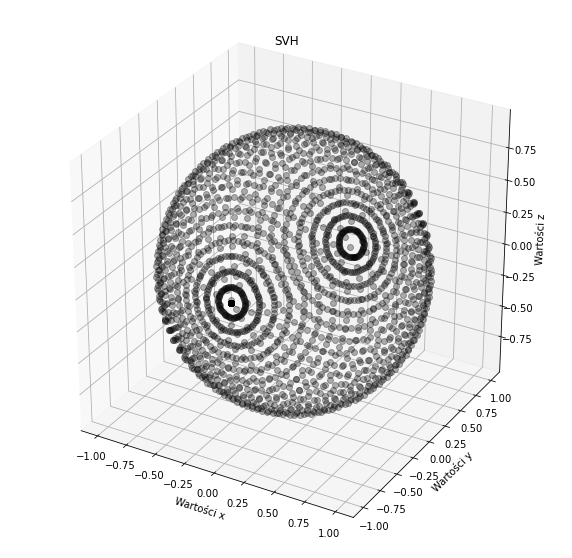

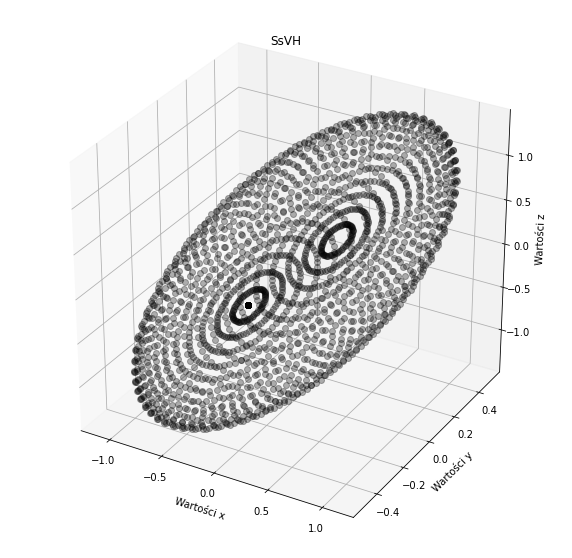

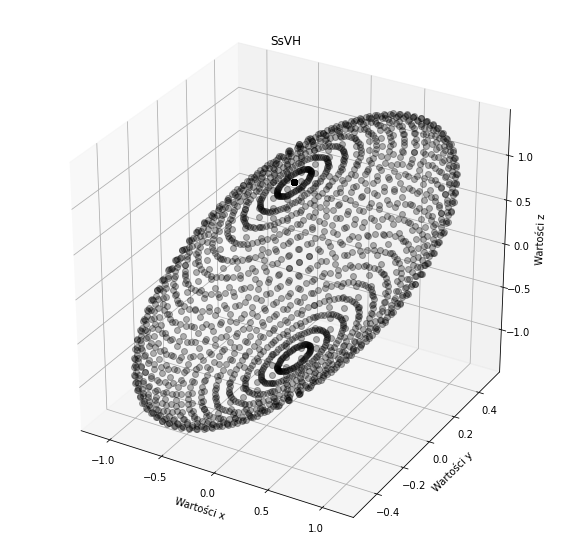

In [563]:
macierz_test = macierz_A3


def test_Svh(wartosci_XYZ, macierz_test):
    u, s, vh = np.linalg.svd(macierz_test)
    nowe_wartosci_x = []
    nowe_wartosci_y = []
    nowe_wartosci_z = []
    for xyz in wartosci_XYZ:
        nowy_wektor = np.matmul(xyz, vh)
        nowe_wartosci_x.append(nowy_wektor[0])
        nowe_wartosci_y.append(nowy_wektor[1])
        nowe_wartosci_z.append(nowy_wektor[2])
    rysuj_punkty_3D(nowe_wartosci_x, nowe_wartosci_y, nowe_wartosci_z, tytul="SVH")

test_Svh(kula, macierz_test)


def test_Ssvh(wartosci_XYZ, macierz_test):
    u, s, vh = np.linalg.svd(macierz_test)
    s = np.diag(s)
    nowe_wartosci_x = []
    nowe_wartosci_y = []
    nowe_wartosci_z = []
    for xyz in wartosci_XYZ:
        nowy_wektor = np.matmul(np.matmul(xyz, s),vh)
        nowe_wartosci_x.append(nowy_wektor[0])
        nowe_wartosci_y.append(nowy_wektor[1])
        nowe_wartosci_z.append(nowy_wektor[2])
    rysuj_punkty_3D(nowe_wartosci_x, nowe_wartosci_y, nowe_wartosci_z, tytul="SsVH")

test_Ssvh(kula, macierz_test)

def test_Susvh(wartosci_XYZ, macierz_test):
    u, s, vh = np.linalg.svd(macierz_test)
    s = np.diag(s)
    nowe_wartosci_x = []
    nowe_wartosci_y = []
    nowe_wartosci_z = []
    for xyz in wartosci_XYZ:

        nowy_wektor = np.matmul(np.matmul(np.matmul(xyz, u),s), vh)
        nowe_wartosci_x.append(nowy_wektor[0])
        nowe_wartosci_y.append(nowy_wektor[1])
        nowe_wartosci_z.append(nowy_wektor[2])
    rysuj_punkty_3D(nowe_wartosci_x, nowe_wartosci_y, nowe_wartosci_z, tytul="SusVH")

test_Susvh(kula, macierz_test)

Dla $SU_{i}Σ_{i}V_{i}^{T}$ kula zamieniła się w taki sam eliptoid jak wcześniej, w końcu $U_{i}Σ_{i}V_{i}^{T} = A_{i}$.


#### Zadanie 2 Kompresja obrazu

 Przygotuj przykładowe zdjęcie o rozmiarze 512×512 pikseli (np. Lenna image) 